In [1]:
import requests
import os
from zipfile import ZipFile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your Alpha Vantage API key
api_key = ''

# Set the stock symbol and function for time series daily data
symbol = 'AAPL'
url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}&outputsize=full'


# Make the request to Alpha Vantage
response = requests.get(url)
data = response.json()

# Extract the time series data (daily stock prices)
time_series = data['Time Series (Daily)']

# Convert to DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index', dtype=float)

# Rename columns for easier readability
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

# Reset index to make date a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'Date'}, inplace=True)

# Show the first few rows
print(df.head())

# Optionally save the data to CSV
df.to_csv('nasdaq_stock_data.csv', index=False)

         Date    Open    High     Low   Close      Volume
0  2024-10-11  229.30  229.41  227.34  227.55  31759188.0
1  2024-10-10  227.78  229.50  227.17  229.04  28183544.0
2  2024-10-09  225.23  229.75  224.83  229.54  33591091.0
3  2024-10-08  224.30  225.98  223.25  225.77  31855693.0
4  2024-10-07  224.50  225.69  221.33  221.69  39505354.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6277 entries, 0 to 6276
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6277 non-null   object 
 1   Open    6277 non-null   float64
 2   High    6277 non-null   float64
 3   Low     6277 non-null   float64
 4   Close   6277 non-null   float64
 5   Volume  6277 non-null   float64
dtypes: float64(5), object(1)
memory usage: 294.4+ KB


In [3]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [4]:
stockvalue = df.sort_values(by='Close', ascending=False)
stockvalue.head(10)

,Date,Open,High,Low,Close,Volume
3034,2012-09-19,700.260,703.99,699.5700,702.100,11674100.0
3035,2012-09-18,699.880,702.33,696.4200,701.910,13339400.0
3032,2012-09-21,702.410,705.07,699.3617,700.095,20413900.0
3036,2012-09-17,699.350,699.80,694.6100,699.781,14215400.0
3033,2012-09-20,699.160,700.06,693.6200,698.700,12020300.0
3037,2012-09-14,689.955,696.98,687.8900,691.280,21445500.0
3031,2012-09-24,686.860,695.12,683.0000,690.790,22848800.0
3038,2012-09-13,677.370,685.50,674.7700,682.980,21370000.0
3028,2012-09-27,664.290,682.17,660.3500,681.320,21217500.0
3042,2012-09-07,678.050,682.48,675.7700,680.440,11773800.0


In [20]:
stockvolume = df.sort_values(by='Volume', ascending=False)
stockvolume.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2020-09-04,120.07,123.70,110.8900,120.96,332607163.0
2024-09-20,229.97,233.09,227.6200,228.20,318679888.0
2020-09-18,110.40,110.88,106.0900,106.84,287104882.0
2020-10-13,125.27,125.39,119.6500,121.10,262330451.0
2020-09-03,126.91,128.84,120.5000,120.88,257599640.0
2024-06-21,210.39,211.89,207.1100,207.49,246421353.0
2020-10-12,120.06,125.18,119.2845,124.40,240226769.0
2020-09-08,113.95,118.99,112.6800,112.82,231366563.0
2020-08-31,127.58,131.00,126.0000,129.04,223505733.0


#Stock Value and Volume
Stock value was peaking at 2012, while Volume was peaking at 2020.
* 2012's stock value peak could be the case of Apple's start to fame, when they introduced their new technology in the iPhone.
* 2020's increase in volume was likely during Covid, when Tech companies were begining to falter because of the increase in prices and workers' worries during covid making it harder to keep staff and maintain their status quo pre-covid.
* More traders during decline in stock price because of the significant drop in value.

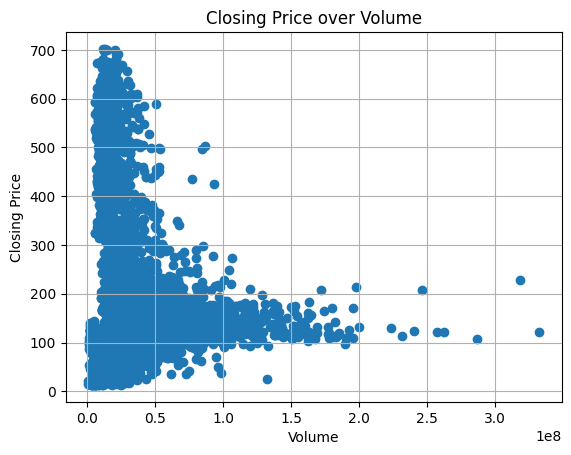

In [5]:
plt.scatter(df['Volume'], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Closing Price over Volume')
plt.grid(True)
plt.show()

# Closing Price over Volume
A visualization that the lower the value of the stock, the more trading occurs. This shows the increase in trading of apple stocks that can mean that there are more traders than the usual.

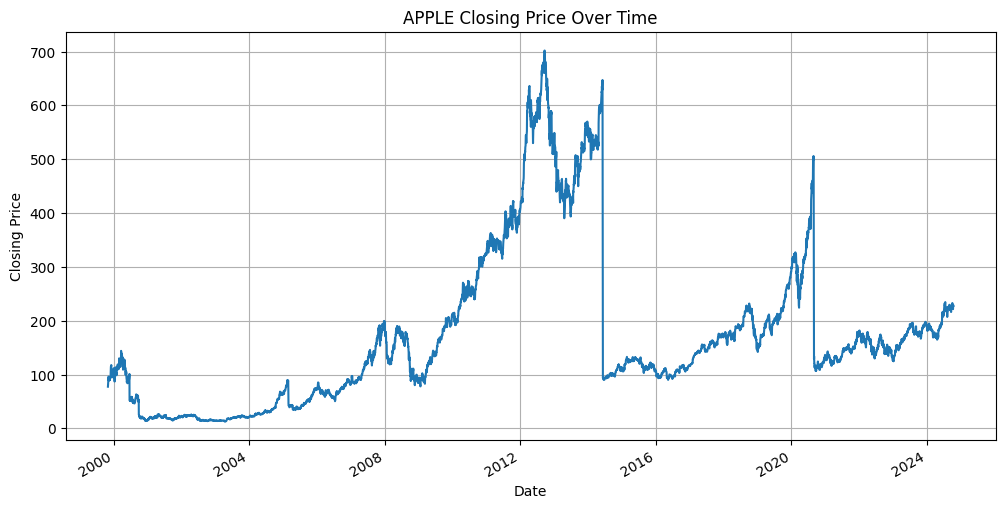

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Close'].plot(figsize=(12, 6))

plt.title('APPLE Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

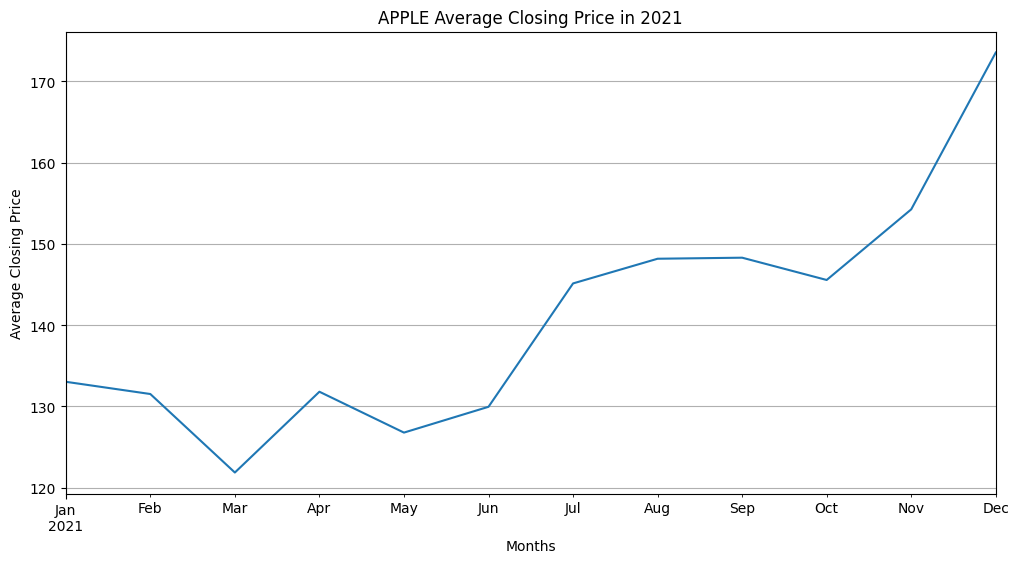

In [7]:
year = 2021
filtered_df = df[df.index.year == year]
monthly_df = filtered_df.resample('ME').mean()

monthly_df['Close'].plot(figsize=(12, 6))
plt.title(f'APPLE Average Closing Price in {year}')
plt.xlabel('Months')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.show()

# Apple closing prices throughout the year, and the month of 2021
Apple has had multiple peaks, showing its first in 2012 and its second closing into 2020. Its suddent drop happened likely because of Covid.

Choosing 2021 was to see its rise during Covid and it is likely when the attention to Covid was relaxed because of economies having massive drops. This is also close to christmas meaning that a winter sale could have also been approaching.

In [8]:
apple_dates = [['2022-09-09', 'iPhone 14 Launch'],
               ['2022-03-18', 'SE 3rd Gen Launch'],
               ['2021-09-24', 'iPhone 13 Launch'],
               ['2020-10-23', 'iPhone 12 Launch'],
               ['2019-09-20', 'iPhone 11 Launch'],
               ['2018-10-26', 'iPhone XR Launch']]

appleevents = pd.DataFrame(apple_dates, columns=['Date', 'Event'])
appleevents['Date'] = pd.to_datetime(appleevents['Date'])

print(appleevents)

        Date              Event
0 2022-09-09   iPhone 14 Launch
1 2022-03-18  SE 3rd Gen Launch
2 2021-09-24   iPhone 13 Launch
3 2020-10-23   iPhone 12 Launch
4 2019-09-20   iPhone 11 Launch
5 2018-10-26   iPhone XR Launch


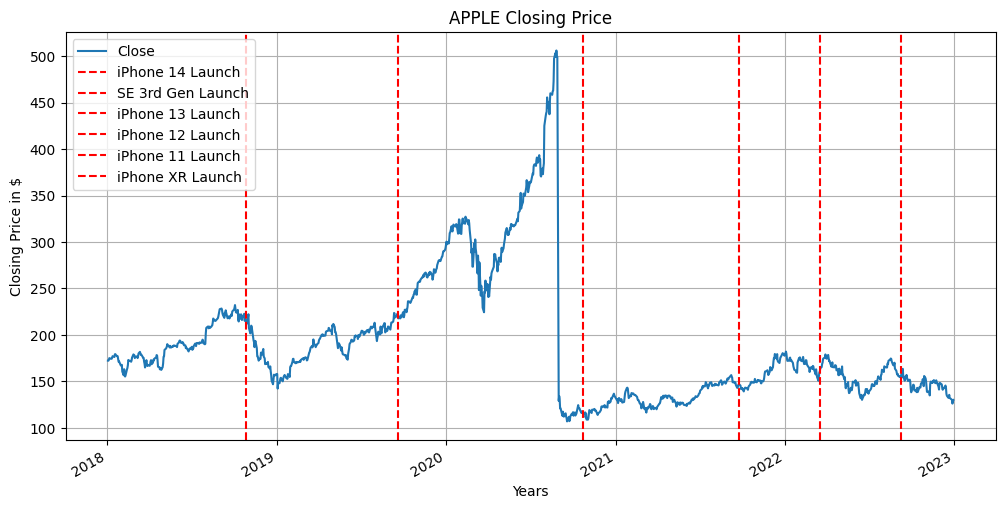

In [9]:
filtered_df = df[(df.index >= '2018-01-01') & (df.index <= '2023-01-01')]

fig, ax = plt.subplots(figsize=(12, 6))
filtered_df['Close'].plot(ax=ax)

for date, event in appleevents[['Date', 'Event']].values:
    ax.axvline(x=date, color='red', linestyle='--', label=event)

plt.title('APPLE Closing Price')
plt.xlabel('Years')
plt.ylabel('Closing Price in $')
plt.grid(True)
plt.legend()
plt.show()

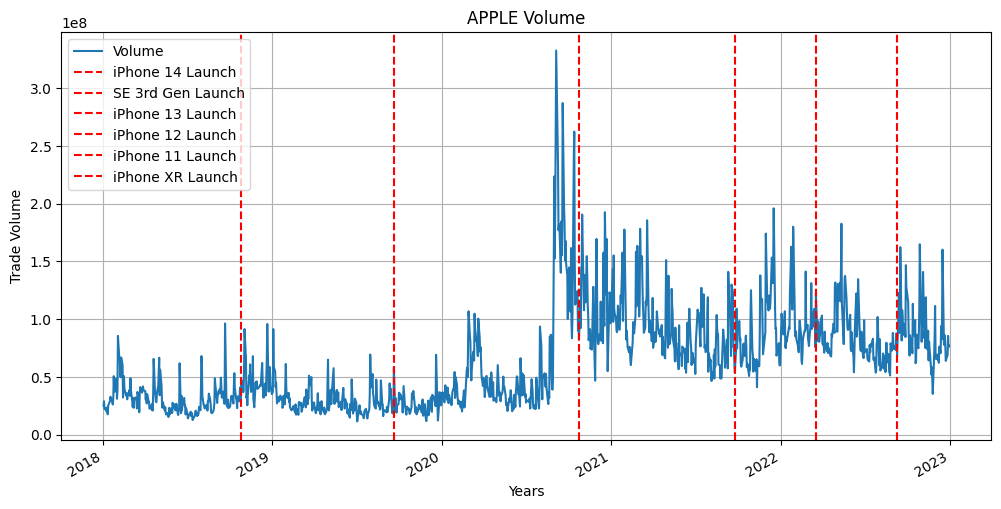

In [10]:
filtered_df = df[(df.index >= '2018-01-01') & (df.index <= '2023-01-01')]

fig, ax = plt.subplots(figsize=(12, 6))
filtered_df['Volume'].plot(ax=ax)

for date, event in appleevents[['Date', 'Event']].values:
    ax.axvline(x=date, color='red', linestyle='--', label=event)

plt.title('APPLE Volume')
plt.xlabel('Years')
plt.ylabel('Trade Volume')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
samsung_dates = [['2022-08-10', 'Galaxy Z Fold4/Flip4 Launch'],
               ['2022-02-09', 'Galaxy S22 Launch'],
               ['2021-01-14', 'Galaxy S21 Launch'],
               ['2020-02-11', 'Galaxy S20 Launch'],
               ['2019-02-20', 'Galaxy S10 Launch']]

samsungevents = pd.DataFrame(samsung_dates, columns=['Date', 'Event'])
samsungevents['Date'] = pd.to_datetime(samsungevents['Date'])

print(samsungevents)

        Date                        Event
0 2022-08-10  Galaxy Z Fold4/Flip4 Launch
1 2022-02-09            Galaxy S22 Launch
2 2021-01-14            Galaxy S21 Launch
3 2020-02-11            Galaxy S20 Launch
4 2019-02-20            Galaxy S10 Launch


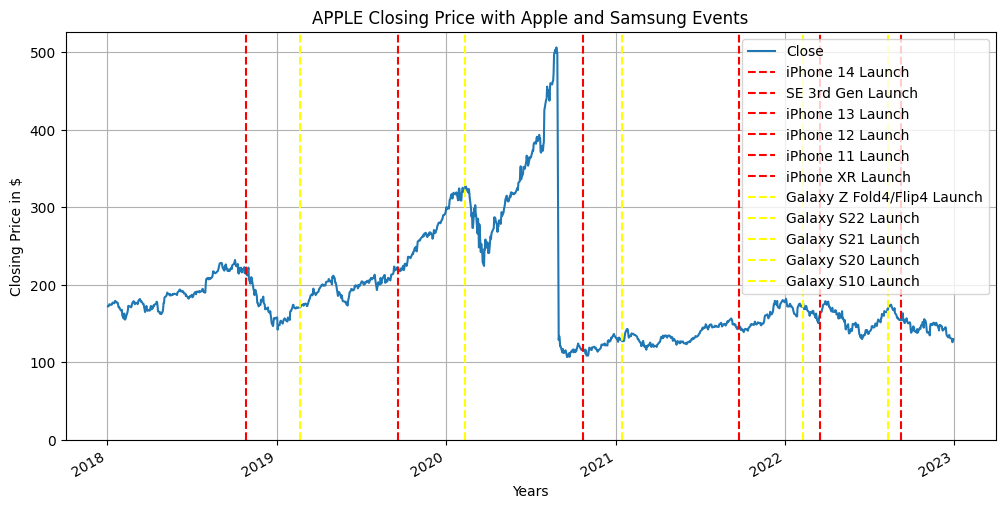

In [12]:
filtered_df = df[(df.index >= '2018-01-01') & (df.index <= '2023-01-01')]

fig, ax = plt.subplots(figsize=(12, 6))
filtered_df['Close'].plot(ax=ax)

for date, event in appleevents[['Date', 'Event']].values:
    ax.axvline(x=date, color='red', linestyle='--', label=event)

for date, event in samsungevents[['Date', 'Event']].values:
    ax.axvline(x=date, color='yellow', linestyle='--', label=event)

plt.title('APPLE Closing Price with Apple and Samsung Events')
plt.xlabel('Years')
plt.ylabel('Closing Price in $')
plt.grid(True)
plt.ylim(bottom=0)
plt.legend()
plt.show()

#Apple stocks timelined
The timeline of APPLE stocks showing both Apple and Samsung events does show that there are effects towards the apple stock when events occur from either side. But they do not show any significant change.

In [13]:
appleevents['Start_Date'] = appleevents['Date'] - pd.DateOffset(days=14)
appleevents['End_Date'] = appleevents['Date'] + pd.DateOffset(days=7)

In [14]:
price_changes = []
for start_date, end_date in zip(appleevents['Start_Date'], appleevents['End_Date']):
    window_data = df[(df.index >= start_date) & (df.index <= end_date)]
    start_price = window_data['Close'].iloc[0]
    end_price = window_data['Close'].iloc[-1]
    percentage_change = ((end_price - start_price) / start_price) * 100
    price_changes.append(percentage_change)

appleevents['Price_Change'] = price_changes

Average Price Change: 3.06%


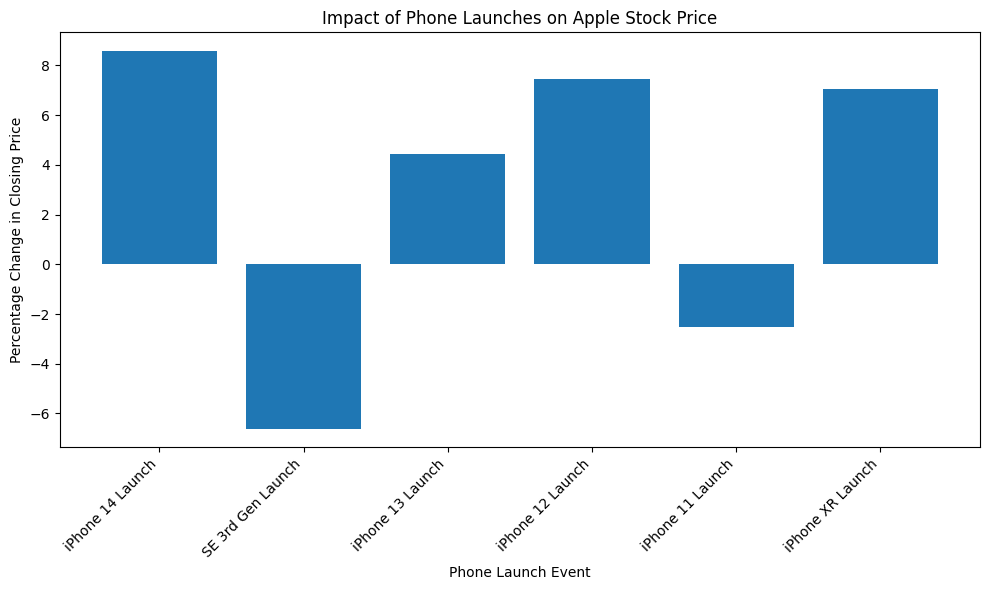

In [15]:
avg_price_change = appleevents['Price_Change'].mean()
print(f"Average Price Change: {avg_price_change:.2f}%")

plt.figure(figsize=(10, 6))
plt.bar(appleevents['Event'], appleevents['Price_Change'])
plt.xlabel("Phone Launch Event")
plt.ylabel("Percentage Change in Closing Price")
plt.title("Impact of Phone Launches on Apple Stock Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
samsungevents['Start_Date'] = samsungevents['Date'] - pd.DateOffset(days=7)
samsungevents['End_Date'] = samsungevents['Date'] + pd.DateOffset(days=7)

In [17]:
price_changes = []
for start_date, end_date in zip(samsungevents['Start_Date'], samsungevents['End_Date']):
    window_data = df[(df.index >= start_date) & (df.index <= end_date)]
    start_price = window_data['Close'].iloc[0]
    end_price = window_data['Close'].iloc[-1]
    percentage_change = ((end_price - start_price) / start_price) * 100
    price_changes.append(percentage_change)

samsungevents['Price_Change'] = price_changes

Average Price Change: -2.00%


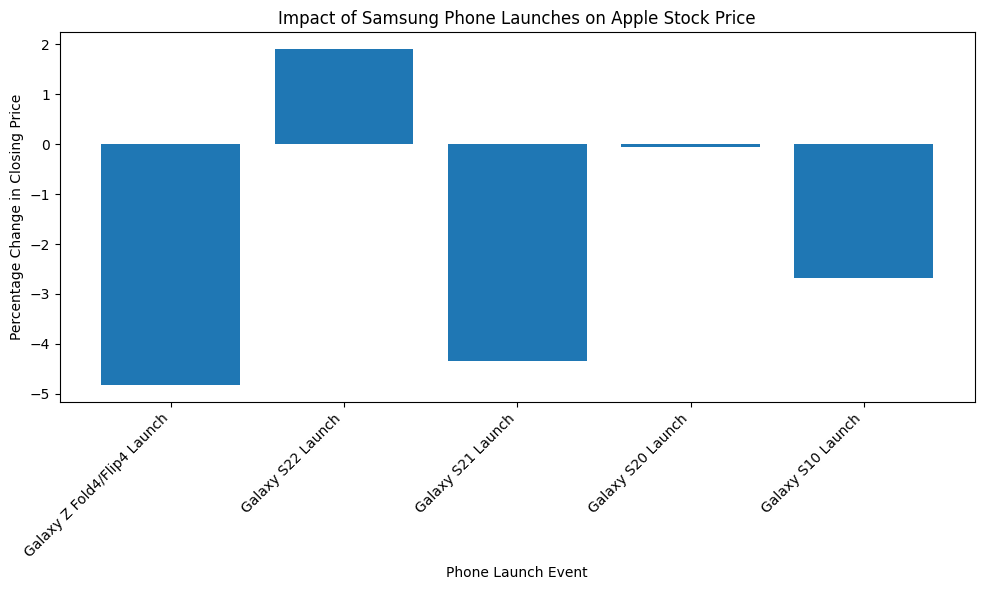

In [18]:
avg_price_change = samsungevents['Price_Change'].mean()
print(f"Average Price Change: {avg_price_change:.2f}%")

plt.figure(figsize=(10, 6))
plt.bar(samsungevents['Event'], samsungevents['Price_Change'])
plt.xlabel("Phone Launch Event")
plt.ylabel("Percentage Change in Closing Price")
plt.title("Impact of Samsung Phone Launches on Apple Stock Price")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Impact of Phone Launches
Using the parameters of 7 days before and after launch, 7 days catching the announcement as well. There is a very slight impact on the dates with events from either side. Showing a positive when the apple events occur and showing a negative when samsung events occur.

In [19]:
from scipy import stats

# Assuming 'appleevents' DataFrame has 'Price_Change' column
price_changes = appleevents['Price_Change'].values

# Create a list representing the null hypothesis (no change)
null_hypothesis = [0] * len(price_changes)

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(price_changes, null_hypothesis)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis.")
    print("There is evidence to suggest that events increase stock prices.")
else:
    print("Fail to reject the null hypothesis.")
    print("There is not enough evidence to suggest that events increase stock prices.")

T-statistic: 1.2079888043781402
P-value: 0.2548434884897066
Fail to reject the null hypothesis.
There is not enough evidence to suggest that events increase stock prices.


# T and P test
showing a fail on rejecting the null hypothesis, it is shown that with such a small increase towards the stock prices. This can be due to external factors that are not in the dataset.